In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

In [474]:
#년도별 가금농가 수 데이터 불러오기
nonga = pd.read_csv('data/가금농가수(년도별).csv', encoding='euc-kr')

In [475]:
nonga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      17 non-null     object
 1   2012    17 non-null     int64 
 2   2013    17 non-null     int64 
 3   2014    17 non-null     int64 
 4   2015    17 non-null     int64 
 5   2016    17 non-null     int64 
 6   2017    17 non-null     int64 
 7   2018    17 non-null     int64 
 8   2019    17 non-null     int64 
 9   2020    17 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


In [476]:
#년도별 농가 수 데이터
nonga.head()

,지역,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,서울특별시,0,0,0,0,0,0,0,0,0
1,부산광역시,21,13,14,17,16,25,25,15,8
2,대구광역시,19,21,19,14,15,16,13,9,8
3,인천광역시,134,119,115,112,100,93,82,61,60
4,광주광역시,22,15,19,21,16,20,17,16,12


In [477]:
#지역별 면적 크기 가져오기
mm = pd.read_csv('data/지역별 면적.csv', encoding='euc-kr')
mm.head()

,지역(1),2018
0,지역(1),대지면적 (㎡)
1,지역(1),대지면적
2,서울특별시,4.61724E-06
3,부산광역시,3.057218
4,대구광역시,3.6101707


In [478]:
#컬럼 정제
mm = mm.drop([0,1],axis=0)
mm = mm.reset_index()
mm = mm.drop(['index'],axis=1)

In [479]:
mm.columns = ['지역','면적']
mmm = mm.drop(['지역'],axis=1)
mmm.head()

,면적
0,4.61724E-06
1,3.057218
2,3.6101707
3,2.8822618
4,2.0968323


In [480]:
#지역,년도별 농가수와 지역별 면적 합치기
nonga = pd.concat([cc, mmm], axis=1)
nonga.head()

,지역,2012,2013,2014,2015,2016,2017,2018,2019,2020,면적
0,서울특별시,0,0,0,0,0,0,0,0,0,4.61724E-06
1,부산광역시,21,13,14,17,16,25,25,15,8,3.057218
2,대구광역시,19,21,19,14,15,16,13,9,8,3.6101707
3,인천광역시,134,119,115,112,100,93,82,61,60,2.8822618
4,광주광역시,22,15,19,21,16,20,17,16,12,2.0968323


In [481]:
nonga.columns = ['지역','2012년','2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','면적']

In [482]:
nonga['면적']=nonga['면적'].astype('float')

In [483]:
nonga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      17 non-null     object 
 1   2012년   17 non-null     int64  
 2   2013년   17 non-null     int64  
 3   2014년   17 non-null     int64  
 4   2015년   17 non-null     int64  
 5   2016년   17 non-null     int64  
 6   2017년   17 non-null     int64  
 7   2018년   17 non-null     int64  
 8   2019년   17 non-null     int64  
 9   2020년   17 non-null     int64  
 10  면적      17 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 1.6+ KB


In [484]:
#농가 밀집도 계산
nonga['2012년'] = nonga['2012년']/nonga['면적']
nonga['2013년'] = nonga['2013년']/nonga['면적']
nonga['2014년'] = nonga['2014년']/nonga['면적']
nonga['2015년'] = nonga['2015년']/nonga['면적']
nonga['2016년'] = nonga['2016년']/nonga['면적']
nonga['2017년'] = nonga['2017년']/nonga['면적']
nonga['2018년'] = nonga['2018년']/nonga['면적']
nonga['2019년'] = nonga['2019년']/nonga['면적']
nonga['2020년'] = nonga['2020년']/nonga['면적']

In [485]:
#농가 밀집도
nonga.head()

,지역,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,면적
0,서울특별시,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005
1,부산광역시,6.868990,4.252232,4.579327,5.560611,5.233516,8.177369,8.177369,4.906421,2.616758,3.057218
2,대구광역시,5.262909,5.816899,5.262909,3.877933,4.154928,4.431923,3.600938,2.492957,2.215962,3.610171
3,인천광역시,46.491266,41.287020,39.899221,38.858372,34.694975,32.266326,28.449879,21.163935,20.816985,2.882262
4,광주광역시,10.492017,7.153648,9.061287,10.015107,7.630558,9.538197,8.107468,7.630558,5.722918,2.096832


In [486]:
nonga.to_csv('지역별밀집도(km).csv',encoding='euc-kr')

In [487]:
#리스크 테이블 생성을 위한 월별 기준 밀집도 파일(월별 평균 기준)
mlzp = pd.read_csv('지역별밀집도(월별km).csv', encoding='euc-kr')

In [488]:
mlzp

,지역,month,밀집도
0,강원도,1,205.556164
1,강원도,2,205.556164
2,강원도,3,205.556164
3,강원도,4,205.556164
4,강원도,5,205.556164
...,...,...,...
199,충청북도,8,258.894769
200,충청북도,9,258.894769
201,충청북도,10,258.894769
202,충청북도,11,258.894769


In [489]:
# 발생건수 열 만들기
mlzp['발생건수']=np.nan
mlzp.head()

,지역,month,밀집도,발생건수
0,강원도,1,205.556164,NaN
1,강원도,2,205.556164,NaN
2,강원도,3,205.556164,NaN
3,강원도,4,205.556164,NaN
4,강원도,5,205.556164,NaN


In [490]:
#발생건수 데이터에 년도, 월 컬럼 추가하여 데이터프레임 생성

#발생건수 데이터 불러오기
AI=pd.read_csv("HPAIOccurlist_final.csv")
AI_occur_m=AI.copy()
AI_occur_m.head()

#불필요한 컬럼 삭제
AI_occur_m.drop(columns=['축종'],inplace=True)
AI_occur_m.drop(columns=['사육\r\n두수'],inplace=True)
AI_occur_m.drop(columns=['진단일'],inplace=True)
AI_occur_m.drop(columns=['지역코드'],inplace=True)

#datetime으로 만들기
AI_occur_m['datetime'] =AI_occur_m['발생일'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))
AI_occur_m

# DataFrame의 index 변형하기
AI_occur_m.set_index('datetime', inplace=True) 

#년도와 월 컬럼 생성
AI_occur_m['year']=AI_occur_m.index.year
AI_occur_m['month']=AI_occur_m.index.month
AI_occur_m=AI_occur_m.reset_index()
AI_occur_m

,datetime,주소,발생일,year,month
0,2021-02-23,강원도 원주시 귀래면 주포리,20210223,2021,2
1,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1
2,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,2016,12
3,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,2016,11
4,2008-05-07,강원도 춘천시 사북면 지촌리,20080507,2008,5
...,...,...,...,...,...
1117,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,2016,12
1118,2016-12-06,충청북도 충주시 대소원면 만정리,20161206,2016,12
1119,2021-02-02,충청북도 충주시 동량면 대전리,20210202,2021,2
1120,2021-03-11,충청북도 충주시 소태면 주치리,20210311,2021,3


In [491]:
#지역별로 보기 위해 '시도', '시군' 나누기

#지역별로 보기 위해 주소컬럼만 추출
AI_occur_address=AI_occur_m['주소']
AI_occur_address=AI_occur_address.to_frame()

#주소 나누기(리스트 형태)
AI_occur_address_d=AI_occur_address['주소'].str.split(' ',1).tolist()
AI_occur_address_d

[['강원도', '원주시 귀래면 주포리'],
 ['강원도', '인제군 기린면 북리'],
 ['강원도', '철원군 갈말읍 강포리'],
 ['강원도', '철원군 갈말읍 강포리'],
 ['강원도', '춘천시 사북면 지촌리'],
 ['강원도', '춘천시 사북면 지촌리'],
 ['강원도', '횡성군 횡성읍 학곡리'],
 ['강원도', '횡성군 횡성읍 학곡리'],
 ['경기도', '고양시 덕양구 관산동'],
 ['경기도', '고양시 덕양구 내유동'],
 ['경기도', '과천시 문원동'],
 ['경기도', '광주시 남한산성면 불당리'],
 ['경기도', '광주시 오포읍 양벌리'],
 ['경기도', '광주시 초월읍 신월리'],
 ['경기도', '김포시 대곶면 쇄암리'],
 ['경기도', '김포시 대곶면 초원지리'],
 ['경기도', '김포시 월곶면 군하리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 수참리'],
 ['경기도', '김포시 하성면 마조리'],
 ['경기도', '남양주시 화도읍 차산리'],
 ['경기도', '동두천시 하봉암동'],
 ['경기도', '성남시 수정구 태평동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '수원시 영통구 하동'],
 ['경기도', '수원시 팔달구 인계동'],
 ['경기도', '수원시 팔달구 화서동'],
 ['경기도', '안성시 공도읍 건천리'],
 ['경기도', '안성시 공도읍 건천리'],
 ['경기도', '안성시 공도읍 마정리'],
 ['경기도', '안성시 공도읍 마정리'],
 ['경기도', '안성시 공도읍 신두리'],
 ['경기도', '안성시 공도읍 용두리'],
 ['경기도', '안성시 공도읍 용두리'],
 ['경기도', '안성시 공도읍 중복리'],
 ['경

In [492]:
#리스트형태 데이터프레임으로 만들어주기
AI_occur_address_de=pd.DataFrame(AI_occur_address['주소'].str.split(' ',1).tolist())

#컬럼명 넣기
AI_occur_address_t=pd.DataFrame(AI_occur_address['주소'].str.split(' ',1).tolist(),
                                    columns=['지역','지역 외'])
AI_occur_address_t

#필요없는 행 삭제
AI_occur_address_total=AI_occur_address_t.drop(columns='지역 외',inplace=False)
AI_occur_address_total

,지역
0,강원도
1,강원도
2,강원도
3,강원도
4,강원도
...,...
1117,충청북도
1118,충청북도
1119,충청북도
1120,충청북도


In [493]:
#발생건수 데이터와 '지역'합쳐주기
AI_occur_month=pd.concat([AI_occur_address_total,AI_occur_m],axis=1)
AI_occur_month.head()

,지역,datetime,주소,발생일,year,month
0,강원도,2021-02-23,강원도 원주시 귀래면 주포리,20210223,2021,2
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,2016,12
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,2016,11
4,강원도,2008-05-07,강원도 춘천시 사북면 지촌리,20080507,2008,5


In [494]:
#발생건수 '지역' 별 카운트
AI_occur_local=AI_occur_month.groupby(['지역'])['발생일'].count()
AI_occur_local=AI_occur_local.to_frame()
AI_occur_local

,발생일
지역,
강원도,8
경기도,261
경상남도,25
경상북도,21
광주광역시,2
대구광역시,4
부산광역시,8
서울특별시,4
세종특별자치시,22


In [495]:
#년-월-시도 발생일 카운트
AI_occur_local_ym=AI_occur_month.groupby(['지역','month'])['발생일'].count()
# 데이터프레임으로 변환
AI_occur_local_ym=AI_occur_local_ym.to_frame()
AI_occur_local_ym

발생일
지역   month     
강원도  1        2
     2        1
     5        2
     6        1
     11       1
...         ...
충청북도 2       75
     3       24
     4        1
     11      46
     12      47

[79 rows x 1 columns]

In [496]:
#2012~2020 데이터만 있어서 해당년도 외의 데이터 삭제
AI_occur_local_ym=AI_occur_month.query('2011 < year < 2021')
AI_occur_local_ym

,지역,datetime,주소,발생일,year,month
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,2016,12
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,2016,11
6,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,2017,1
7,강원도,2014-06-13,강원도 횡성군 횡성읍 학곡리,20140613,2014,6
...,...,...,...,...,...,...
1114,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,2016,12
1115,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,2016,12
1116,충청북도,2016-11-29,충청북도 청주시 흥덕구 오송읍 쌍청리,20161129,2016,11
1117,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,2016,12


In [497]:
month=pd.DataFrame(columns=AI_occur_local_ym.columns)
month.head()

,지역,datetime,주소,발생일,year,month


In [498]:
AI_occur_local_ym.head()

,지역,datetime,주소,발생일,year,month
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,2016,12
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,2016,11
6,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,2017,1
7,강원도,2014-06-13,강원도 횡성군 횡성읍 학곡리,20140613,2014,6


In [499]:
#년도별로 정리
for n1, group in AI_occur_local_ym.groupby(['month']):
    group.reset_index(inplace=True, drop=True)
    if group.loc[0,'month'] in [1,2,3,4,5,6,7,8,9,10,11,12]:
        month=pd.concat([month, group])

In [500]:
month

,지역,datetime,주소,발생일,year,month
0,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1
1,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,2017,1
2,경기도,2015-01-19,경기도 광주시 오포읍 양벌리,20150119,2015,1
3,경기도,2015-01-31,경기도 김포시 통진읍 가현리,20150131,2015,1
4,경기도,2017-01-21,경기도 김포시 하성면 마조리,20170121,2017,1
...,...,...,...,...,...,...
297,충청북도,2016-12-10,충청북도 청주시 흥덕구 강내면 궁현리,20161210,2016,12
298,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,2016,12
299,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,2016,12
300,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,2016,12


In [501]:
month['발생건수']=1
month

,지역,datetime,주소,발생일,year,month,발생건수
0,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,2017,1,1
1,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,2017,1,1
2,경기도,2015-01-19,경기도 광주시 오포읍 양벌리,20150119,2015,1,1
3,경기도,2015-01-31,경기도 김포시 통진읍 가현리,20150131,2015,1,1
4,경기도,2017-01-21,경기도 김포시 하성면 마조리,20170121,2017,1,1
...,...,...,...,...,...,...,...
297,충청북도,2016-12-10,충청북도 청주시 흥덕구 강내면 궁현리,20161210,2016,12,1
298,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,2016,12,1
299,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,2016,12,1
300,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,2016,12,1


In [502]:
B=month.groupby(['지역','month']).sum()
B

발생건수
지역   month      
강원도  1         2
     6         1
     11        1
     12        1
경기도  1        36
...          ...
충청북도 2        71
     3        22
     4         1
     11       46
     12       41

[65 rows x 1 columns]

In [503]:
mlzp2=mlzp.groupby(['지역','month']).mean()
mlzp2

밀집도  발생건수
지역   month                  
강원도  1      205.556164   NaN
     2      205.556164   NaN
     3      205.556164   NaN
     4      205.556164   NaN
     5      205.556164   NaN
...                ...   ...
충청북도 8      258.894769   NaN
     9      258.894769   NaN
     10     258.894769   NaN
     11     258.894769   NaN
     12     258.894769   NaN

[204 rows x 2 columns]

In [504]:
#발생건수 합쳐주기.
A=mlzp2.groupby(['지역','month']).sum()
print(A)
A['발생건수']=B
#A.loc[2019,'발생건수']=np.round((A.loc[2018,'발생건수']+A.loc[2020,'발생건수'])/2,0)
A=A.fillna(0)
A

                   밀집도  발생건수
지역   month                  
강원도  1      205.556164   0.0
     2      205.556164   0.0
     3      205.556164   0.0
     4      205.556164   0.0
     5      205.556164   0.0
...                ...   ...
충청북도 8      258.894769   0.0
     9      258.894769   0.0
     10     258.894769   0.0
     11     258.894769   0.0
     12     258.894769   0.0

[204 rows x 2 columns]


밀집도  발생건수
지역   month                  
강원도  1      205.556164   2.0
     2      205.556164   0.0
     3      205.556164   0.0
     4      205.556164   0.0
     5      205.556164   0.0
...                ...   ...
충청북도 8      258.894769   0.0
     9      258.894769   0.0
     10     258.894769   0.0
     11     258.894769  46.0
     12     258.894769  41.0

[204 rows x 2 columns]

In [505]:
A.describe()

,밀집도,발생건수
count,204.000000,204.000000
mean,172.396920,4.431373
std,208.789464,12.786623
min,0.000000,0.000000
25%,7.962109,0.000000
50%,83.456695,0.000000
75%,258.894769,1.250000
max,772.426945,111.000000


In [526]:
#밀집도 구간별로 나눠서 피어슨, 스피어만 상관계수 검정으로 데이터 분석
mlzp_gun2 = pd.read_csv('700.csv', encoding='utf-8')
mlzp_gun1 = pd.read_csv('300~400.csv', encoding='utf-8')
mlzp_gun3 = pd.read_csv('100.csv', encoding='utf-8')

In [528]:
from scipy import stats

In [529]:
corr = stats.pearsonr(mlzp_gun2.밀집도, mlzp_gun2.발생건수)
corr

(0.17981592089759993, 0.6434093193186762)

In [530]:
rho1 = stats.spearmanr(mlzp_gun1.밀집도, mlzp_gun1.발생건수)
rho1

SpearmanrResult(correlation=0.10004762340521331, pvalue=0.6928526829238087)

In [531]:
rho2 = stats.spearmanr(mlzp_gun2.밀집도, mlzp_gun2.발생건수)
rho2

SpearmanrResult(correlation=0.052223296786709346, pvalue=0.8938530686299837)

In [532]:
rho3 = stats.spearmanr(mlzp_gun3.밀집도, mlzp_gun3.발생건수)
rho3

SpearmanrResult(correlation=0.30796759894769954, pvalue=0.005158715525880536)

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_25 - quantile_75
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [ ]:
# 신뢰구간 기준 만들기
confidence_dic={}
for sido, group in new_A.groupby(['지역']):
    group.reset_index(inplace=True, drop=True)
    confidence_dic[sido]={}
    temp=group.groupby(['month']).mean()
    for month,group in temp.groupby(['month']):
        if len(group)==0:
             continue
        group.reset_index(inplace=True, drop=True)
        # 그룹내 이상값 제거
        outlier_idx = get_outlier(df=group, column='밀집도', weight=1.5)
        group.drop(outlier_idx, axis=0, inplace=True)
        outlier_idx = get_outlier(df=group, column='발생건수', weight=1.5)
        group.drop(outlier_idx, axis=0, inplace=True)
        confidence_dic[sido][month]=group.describe()

In [506]:
x=np.reshape(A['밀집도'].values, ((1,)+A['발생건수'].values.shape))

In [507]:
x=np.expand_dims(A['밀집도'].values, axis=1)

In [508]:
x

array([[205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [205.5561636 ],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [ 83.45669454],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [113.3676203 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387.5264793 ],
       [387

In [509]:
y=A['발생건수'].values
y

array([  2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
         1.,  36.,  23.,  12.,   8.,   2.,   2.,   0.,   0.,   0.,   0.,
        10., 111.,   3.,   1.,   0.,   1.,   0.,   3.,   0.,   0.,   0.,
         0.,   0.,   4.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
         0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  16.,   0.,
         2.,   0.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         1.,  31.,  19.,  34.,   3.,   7.,   5.,   

In [510]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

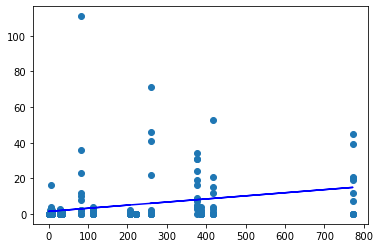

In [511]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=밀집도
# y축=발생건수

In [512]:
C=new_A['밀집도']
C.head()

0    205.556164
1    205.556164
2    205.556164
3    205.556164
4    205.556164
Name: 밀집도, dtype: float64

In [513]:
result=[]
#num=C
for i in C:
    result.append(np.round(regr.predict([[i]]),0))

In [514]:
result

[array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([5.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([3.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([8.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array

In [515]:
print(regr.coef_, regr.intercept_)

[0.01743926] 1.4248970130748737


In [516]:
A.to_csv('density_rist_table_final.csv', encoding='euc-kr')

In [321]:
new_A.to_csv('data/density_risk_table_final.csv', encoding='utf-8-sig', index=False)